# Natural Language Processing

## Importing the libraries

In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd

### Explanation

- `numpy` is imported to handle numerical operations efficiently.
- `pandas` is imported to work with data structures like DataFrames, which are commonly used in data analysis tasks.


## Importing the dataset

In [21]:
# Read data from an Excel file
# Use only the 'review_text' column from the Excel file
df = pd.read_excel('review-details.xlsx', usecols=['review_text'])

### Explanation

- `pd.read_excel()` is used to read data from an Excel file.
- We specify the file path and provide the `usecols` parameter to select only the 'review_text' column from the Excel file.
- The data is stored in the DataFrame `df`.


## Cleaning the texts

In [22]:
# Import necessary libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download NLTK stopwords data
nltk.download('stopwords')

# Initialize an empty list to store preprocessed text data
corpus = []

# Loop through the first 1000 rows of the DataFrame 'df'
for i in range(0, 1000):
    # Remove non-alphabetic characters from the review text using regular expressions
    review = re.sub('[^a-zA-Z]', ' ', df['review_text'][i])

    # Convert all letters to lowercase
    review = review.lower()

    # Tokenize the review text into individual words
    review = review.split()

    # Initialize a Porter stemmer object
    ps = PorterStemmer()

    # Get the list of English stopwords from NLTK and remove 'not' from it
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')

    # Stem and remove stopwords from the review text
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]

    # Join the list of words back into a string
    review = ' '.join(review)

    # Append the preprocessed review text to the 'corpus' list
    corpus.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Explanation

- `re` is imported for regular expression operations.
- `nltk` is imported for natural language processing tasks.
- We download the NLTK stopwords dataset using `nltk.download('stopwords')`.
- The `stopwords` and `PorterStemmer` modules from NLTK are imported.
- A list named `corpus` is initialized to store the preprocessed text data.
- We loop through the first 1000 rows of the DataFrame `df`.
- Each review text is preprocessed:
  - Non-alphabetic characters are removed using a regular expression.
  - All letters are converted to lowercase.
  - The review text is tokenized into individual words.
  - A Porter stemmer object is initialized.
  - The English stopwords are retrieved from NLTK, and 'not' is removed from the list.
  - Each word in the review text is stemmed using the Porter stemmer, and stopwords are removed.
  - The list of words is joined back into a string.
  - The preprocessed review text is appended to the `corpus` list.

In [23]:
print(corpus)

['get older know like suitabl bodi like dove product give fresh wide awak feel dandruff flakey skin smelli pit', 'three gigant marmit jar last probabl whole life els would possibl wish order came time mention safe pack happi', 'excel', 'great flavour top slow cook', 'say', 'excel', 'three gigant marmit jar last probabl whole life els would possibl wish order came time mention safe pack happi', 'great flavour top slow cook', 'excel item good men', 'thank happi', 'thank happi', 'beauti', 'alway buy big bottl', 'say', 'alway use product heavili mistreat hair work wonder time time', 'great valu', 'alway use product heavili mistreat hair work wonder time time', 'not one pictur get star regular one use awesom peopl dri skin', 'item describ excel qualiti rapid deliveri great skin irrit red blemish', 'good bodi wash not strong smell', 'great', 'great', 'worth', 'rememb tri friend hous year ago ive use month one ill buy', 'great', 'not best antiperspir unless like go work snow drift arm', 'love

## Creating the Bag of Words model

In [24]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer object
# Limit the maximum number of features to 1500
cv = CountVectorizer(max_features=1500)

# Convert the corpus of preprocessed text data into a bag-of-words representation
# This converts text data into a matrix where rows represent documents and columns represent words,
# with each cell containing the count of the word in the corresponding document
vect = cv.fit_transform(corpus).toarray()


### Explanation

- `CountVectorizer` from scikit-learn is imported for converting text data into a bag-of-words representation.
- A `CountVectorizer` object named `cv` is initialized with a limit of 1500 maximum features (words).
- The `fit_transform()` method is used to fit the `CountVectorizer` on the preprocessed corpus data (`corpus`) and convert it into a bag-of-words matrix (`vect`).
- The bag-of-words matrix represents each document in the corpus as a vector of word counts.


In [25]:
# Import necessary libraries
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models
import warnings

# Suppress DeprecationWarning from gensim
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Install pyLDAvis if not already installed
# !pip install pyLDAvis

### Explanation

- `gensim` is imported for topic modeling and natural language processing tasks.
- `pyLDAvis` and `pyLDAvis.gensim_models` are imported for visualizing topic modeling results.
- `warnings` is imported to suppress DeprecationWarning from gensim.
- `simple_preprocess` from gensim.utils is imported for text preprocessing tasks.
- `CoherenceModel` from gensim.models is imported for coherence calculation.
- The code installs `pyLDAvis` if it's not already installed. (Commented out for clarity, as it's generally assumed to be installed separately).


In [26]:
# Import necessary libraries
import spacy

# Define a function for lemmatization
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    # Load the spaCy English model
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

    # Initialize an empty list to store the lemmatized texts
    texts_out = []

    # Loop through each text in the input list 'texts'
    for text in texts:
        # Process the text with the spaCy pipeline
        doc = nlp(text)

        # Initialize an empty list to store lemmatized tokens
        new_text = []

        # Loop through each token in the processed document
        for token in doc:
            # Check if the token's part of speech is in the allowed list
            if token.pos_ in allowed_postags:
                # Lemmatize the token and append it to the new_text list
                new_text.append(token.lemma_)

        # Join the list of lemmatized tokens into a string
        final = " ".join(new_text)

        # Append the lemmatized text to the texts_out list
        texts_out.append(final)

    # Return the list of lemmatized texts
    return texts_out

# Perform lemmatization on the corpus
lemmatized_texts = lemmatization(corpus)

# Print the lemmatized texts (for demonstration purposes)
print(lemmatized_texts)


['get old know suitabl bodi dove product give fresh wide feel dandruff', 'gigant marmit jar last probabl whole life el possibl wish order come time mention safe pack happi', 'excel', 'great flavour top slow cook', 'say', 'excel', 'gigant marmit jar last probabl whole life el possibl wish order come time mention safe pack happi', 'great flavour top slow cook', 'excel item good man', 'thank happi', 'thank happi', '', 'alway buy big bottl', 'say', 'alway use product heavili hair work wonder time time', 'great valu', 'alway use product heavili hair work wonder time time', 'pictur get star regular use awesom skin', 'excel qualiti rapid deliveri great skin', 'good bodi wash strong smell', 'great', 'great', 'worth', 'rememb friend hous year ago ve use month ill buy', 'great', 'good antiperspir go work snow drift arm', 'love product', 'die eat u die content man love', 'greasi easi appli soak skin feel super soft money scent fresh light great go collect part', 'suffer sensit skin vaselin produc

### Explanation

- `spacy` is imported for performing lemmatization.
- A function named `lemmatization` is defined to perform lemmatization on a list of texts.
- Inside the function:
  - The spaCy English model ("en_core_web_sm") is loaded and named `nlp`.
  - The function loops through each text in the input list and processes it using spaCy.
  - For each token in the processed document, if its part of speech is in the allowed list (`allowed_postags`), it's lemmatized and added to a new list.
  - The lemmatized tokens are joined into a string and appended to the `texts_out` list.
  - The function returns the list of lemmatized texts.
- Finally, the lemmatization is performed on the `corpus`, and the result is printed.


In [27]:
# Define a function to generate words from texts
def gen_words(texts):
    # Initialize an empty list to store the final words
    final = []

    # Loop through each text in the input list 'texts'
    for text in texts:
        # Tokenize the text using gensim's simple_preprocess function, removing accents
        new = gensim.utils.simple_preprocess(text, deacc=True)

        # Append the tokenized text to the final list
        final.append(new)

    # Return the list of final words
    return final

# Generate words from the lemmatized texts
data_words = gen_words(lemmatized_texts)

# Print the first 20 words from the first document (for demonstration purposes)
print(data_words[0][0:20])


['get', 'old', 'know', 'suitabl', 'bodi', 'dove', 'product', 'give', 'fresh', 'wide', 'feel', 'dandruff']


### Explanation

- A function named `gen_words` is defined to generate words from a list of texts.
- Inside the function:
  - The function loops through each text in the input list and tokenizes it using gensim's `simple_preprocess` function, removing accents.
  - The tokenized text is appended to the `final` list.
  - The function returns the list of final words.
- Finally, the function is used to generate words from the lemmatized texts (`lemmatized_texts`), and the first 20 words from the first document are printed for demonstration purposes.


In [28]:
# Create a dictionary mapping words to their integer ids
id2word = corpora.Dictionary(data_words)

# Initialize an empty list to store the corpus in bag-of-words format
corpus = []

# Convert each document in 'data_words' into a bag-of-words representation using the dictionary
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

# Print the first 20 elements of the bag-of-words representation of the first document (for demonstration purposes)
print(corpus[0][0:20])

# Retrieve the word corresponding to the integer id 0
# This is just for demonstration purposes, and might not correspond to a meaningful word
word = id2word[[0][:1][0]]
print(word)


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]
bodi


### Explanation

- A `Dictionary` object named `id2word` is created using the `corpora.Dictionary` function, which maps words to their integer ids.
- An empty list named `corpus` is initialized to store the bag-of-words representation of the documents.
- Each document in `data_words` is converted into a bag-of-words representation using the `doc2bow` method of the `id2word` dictionary, and appended to the `corpus` list.
- The first 20 elements of the bag-of-words representation of the first document are printed for demonstration purposes.
- The word corresponding to the integer id 0 is retrieved from the `id2word` dictionary (just for demonstration purposes).


In [29]:
# Train an LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,  # The bag-of-words corpus
                                            id2word=id2word,  # The dictionary mapping word ids to words
                                            num_topics=30,  # Number of topics to extract
                                            random_state=100,  # Random state for reproducibility
                                            update_every=1,  # Update model every chunk
                                            chunksize=100,  # Number of documents to use in each training chunk
                                            passes=10,  # Number of passes through the corpus
                                            alpha="auto")  # Automatically set alpha parameter


### Explanation

- An LDA model (`lda_model`) is trained using the `gensim.models.ldamodel.LdaModel` constructor.
- Parameters passed to the constructor:
  - `corpus`: The bag-of-words representation of the documents.
  - `id2word`: The dictionary mapping word ids to words.
  - `num_topics`: The number of topics to extract from the corpus.
  - `random_state`: The random state for reproducibility.
  - `update_every`: The frequency of updating the model.
  - `chunksize`: The number of documents to use in each training chunk.
  - `passes`: The number of passes through the corpus.
  - `alpha`: The hyperparameter controlling the topic distribution. Here, "auto" means it will be set automatically.


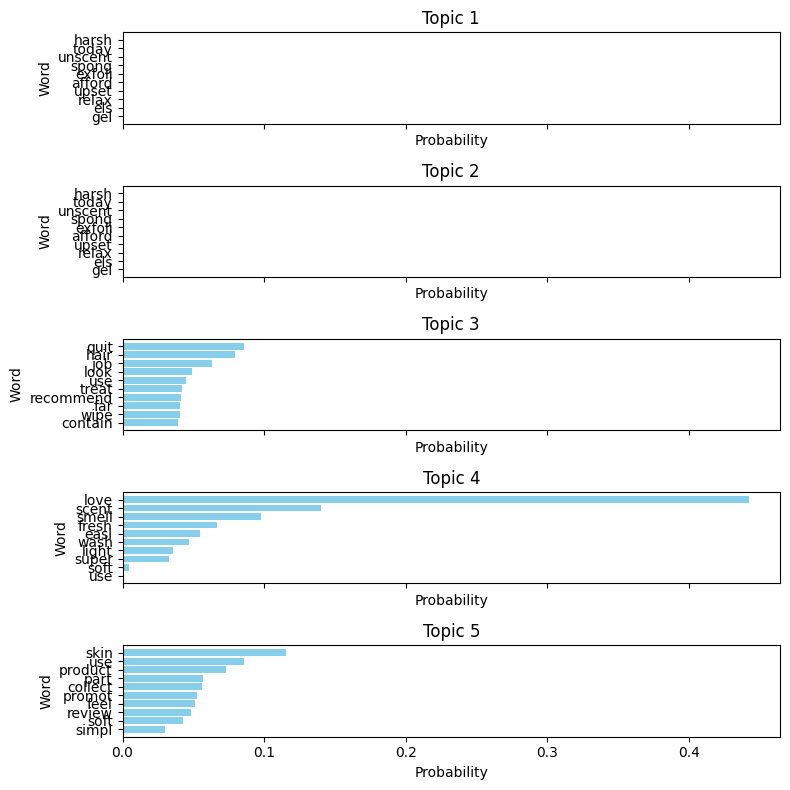

In [30]:
import matplotlib.pyplot as plt

def visualize_topics(lda_model, num_topics, num_words=10):
    # Create subplots to display each topic
    fig, axes = plt.subplots(nrows=num_topics, ncols=1, figsize=(8, 8), sharex=True)

    # Get the top words for each topic from the LDA model
    topics = lda_model.show_topics(num_topics=num_topics, num_words=num_words, formatted=False)

    # Iterate through each topic and plot a horizontal bar chart of the top words
    for i, (topic, ax) in enumerate(zip(topics, axes.flatten())):
        words = [word for word, _ in topic[1]]
        probs = [prob for _, prob in topic[1]]

        ax.barh(words, probs, color='skyblue')
        ax.invert_yaxis()
        ax.set_title(f'Topic {i+1}')
        ax.set_xlabel('Probability')
        ax.set_ylabel('Word')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# lda_model: your trained LDA model
# num_topics: number of topics in your model
# num_words: number of words to display per topic
visualize_topics(lda_model, num_topics=5, num_words=10)


### Explanation

- The function `visualize_topics` is defined to visualize the top words for each topic in the LDA model.
- It creates a subplot for each topic and plots a horizontal bar chart showing the probability of each word in the topic.
- The top words for each topic are obtained from the LDA model using the `show_topics` method.
- The function parameters allow specifying the number of topics and the number of words to display per topic.
- Finally, the function is called with the LDA model, number of topics, and number of words to display per topic as arguments to visualize the topics.


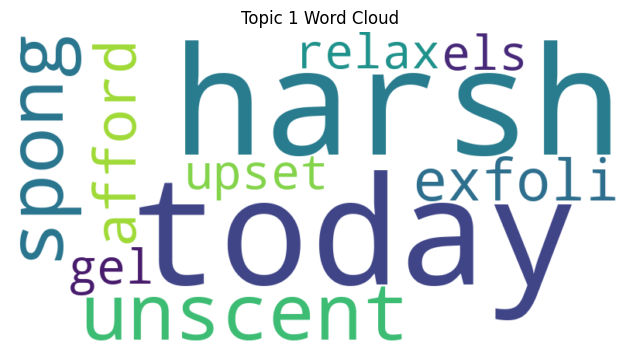

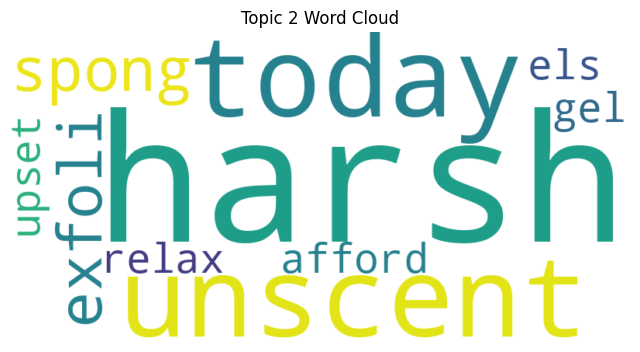

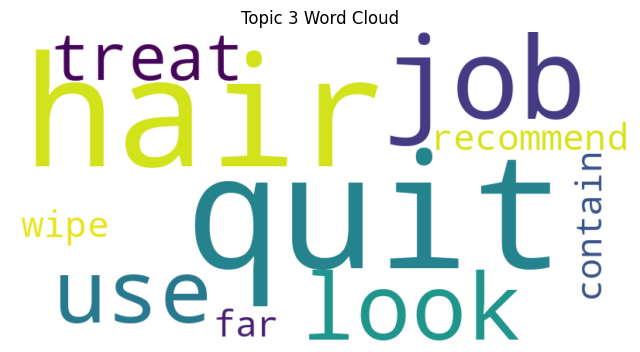

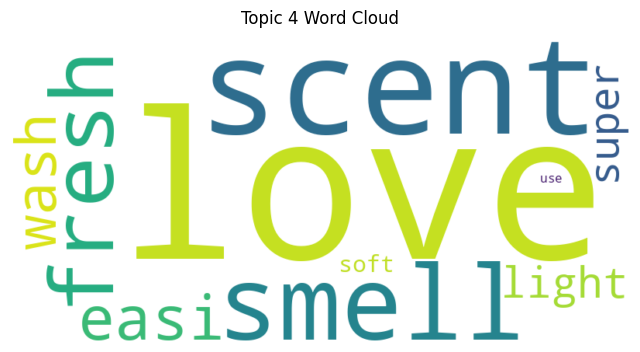

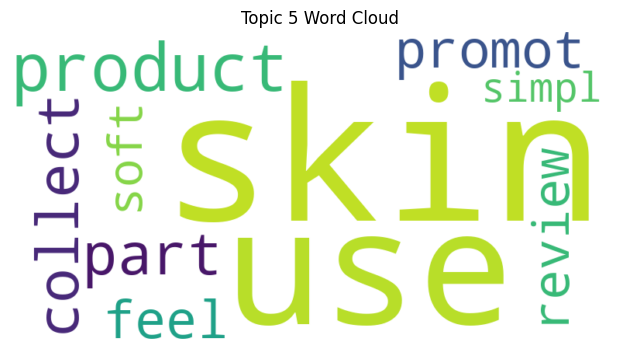

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def visualize_topics_wordcloud(lda_model, num_topics, num_words=10):
    # Get the top words for each topic from the LDA model
    topics = lda_model.show_topics(num_topics=num_topics, num_words=num_words, formatted=False)

    # Iterate through each topic and create a word cloud
    for i, topic in enumerate(topics):
        # Create a dictionary of word frequencies for the topic
        word_freq = {word: freq for word, freq in topic[1]}

        # Generate the word cloud from the word frequency dictionary
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

        # Plot the word cloud
        plt.figure(figsize=(8, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topic {i+1} Word Cloud')
        plt.axis('off')
        plt.show()

# lda_model: your trained LDA model
# num_topics: number of topics in your model
# num_words: number of words to display per topic
visualize_topics_wordcloud(lda_model, num_topics=5, num_words=10)


### Explanation

- The function `visualize_topics_wordcloud` is defined to visualize the top words for each topic in the LDA model using word clouds.
- It iterates through each topic and creates a word cloud based on the word frequencies in the topic.
- The parameters `num_topics` and `num_words` allow specifying the number of topics and the number of words to display per topic, respectively.
- Finally, the function is called with the LDA model, number of topics, and number of words to display per topic as arguments to visualize the topics using word clouds.


In [32]:
import plotly.graph_objects as go

def visualize_topics_interactive(lda_model, num_topics, num_words=10):
    # Get the top words for each topic from the LDA model
    topics = lda_model.show_topics(num_topics=num_topics, num_words=num_words, formatted=False)

    # Create traces for each topic
    traces = []
    for i, topic in enumerate(topics):
        # Extract words and probabilities for the current topic
        words = [word for word, _ in topic[1]]
        probs = [prob for _, prob in topic[1]]

        # Create a bar trace for the current topic
        trace = go.Bar(x=words, y=probs, name=f'Topic {i+1}')

        # Append the trace to the list of traces
        traces.append(trace)

    # Create layout for the plot
    layout = go.Layout(title='Topic Modeling Results',
                       xaxis=dict(title='Words'),
                       yaxis=dict(title='Probabilities'),
                       barmode='group')

    # Create figure
    fig = go.Figure(data=traces, layout=layout)

    # Show interactive plot
    fig.show()

# lda_model: your trained LDA model
# num_topics: number of topics in your model
# num_words: number of words to display per topic
visualize_topics_interactive(lda_model, num_topics=5, num_words=10)


### Explanation

- The function `visualize_topics_interactive` is defined to visualize the top words for each topic in the LDA model using an interactive plot.
- It creates a bar trace for each topic, with words on the x-axis and probabilities on the y-axis.
- The parameters `num_topics` and `num_words` allow specifying the number of topics and the number of words to display per topic, respectively.
- Finally, the function is called with the LDA model, number of topics, and number of words to display per topic as arguments to visualize the topics using an interactive plot.
